#### CSCE 670 :: Information Storage & Retrieval :: Texas A&M University :: Spring 2023


# Project 1:  Lyrical Search Engine





# Dataset: Genius Lyrics Dataset

We are providing you with a small collection of the lyrics to 200 songs collected from Genius (https://genius.com/). The full data was originally collected by Austin Benson at Cornell (https://www.cs.cornell.edu/~arb/data/genius-expertise/). For this homework, you can use just the small set we provide: **lyrics_200.jl**. You should treat each song as a unique document to be indexed by your system. You can download the data from eCampus to your local filesystem. We're going to use these lyrics as the basis of a Lyrical Search Engine!

# Part 1: Reading and Parsing the Lyrics Data

Our goal is to read the lyrics so that we can begin to tokenize them later. For this step, you should read the dataset and print the lyrics. Note that our dataset is in JSON lines format, meaning that each line break separates an entry in JSON format. A document looks like:

{'songs': 'Linkin-park-in-the-end-lyrics', 'lyrics': '\n\n[Verse 1: Mike Shinoda & Chester Bennington]\nIt starts...'}

For this homework, you should treat the lyrics as a document and the songs as the document ID.

Your output should look like this:

DocumentID Document

Linkin-park-in-the-end-lyrics \n\n[Verse 1: Mike Shinoda & Chester Bennington]\nIt starts...

... ...

In [7]:
# your code here
import json
# from google.colab import files

with open('lyrics_200.jl','r') as file:
  data = [json.loads(line) for line in file]

lyrics_doc = {}
for d in data:
  lyrics_doc[d['song']] = d['lyrics'] 

# for key in lyrics_doc:
#   print(key, json.dumps(lyrics_doc[key]))


Now that you can read the documents, let's move on to tokenization. You should lowercase all words. Your parser needs to also provide the following three pre-processing options:
1. Remove background vocals (strings in parentheses) and song structure indicators 
(strings in square brackets, e.g., [Verse 1: Mike Shinoda & Chester Bennington])
2. Lemmatization: use nltk Lemmatizer `from nltk.stem import WordNetLemmatizer`
3. Remove any other strings that you think are less informative or noisy, e.g., non-word vocal sounds, non-character.

Please note that you should stick to the stemming package listed above. Otherwise, given the same query, the results generated by your code can be different from others. For tokenization, you could use [nltk.tokenize.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize) or you can write your own.

## Observations 

Once you have your parser working, you should 

* print the first two documents (documentID and tokens);

* report the size of your dictionary, that is, how many unique tokens;

* print a list of the top-10 most popular words by count;

under the four cases:

* None of pre-processing options (that is, just whatever nltk.tokenize.word_tokenize gives you)
* (1) Remove background vocals
* (1) + (2) Remove background vocals + Lemmatization
* (1) + (2) + (3) Remove background vocals  + Lemmatization + Remove other

Your output should look like this:

* DocumentID Tokens

* Unique token numbers:

* Rank Token Count

   1    awesome    20


In [229]:
# Your parser function here. It will take the three option variables above as the parameters.
# add cells as needed to organize your code
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

def parser(lyrics_doc,option):
  lyrics_token = {}
  
  if option == 0:
    lyrics_token = {key: str.lower(lyrics_doc[key]) for key in lyrics_doc}
    lyrics_token = {key : nltk.tokenize.word_tokenize(lyrics_token[key]) for key in lyrics_token}
    
    
  
  if option == 1:
    lyrics_token = {key : re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', str.lower(lyrics_doc[key])) for key in lyrics_doc}
    lyrics_token = {key : nltk.tokenize.word_tokenize(lyrics_token[key]) for key in lyrics_token}
   
    
  if option == 2:
    lyrics_token = {key : re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', str.lower(lyrics_doc[key])) for key in lyrics_doc}
    lyrics_token = {key : nltk.tokenize.word_tokenize(lyrics_token[key]) for key in lyrics_token}
    lemmatizer = WordNetLemmatizer()
    for key in lyrics_token:
      lyrics_token[key] = [lemmatizer.lemmatize(word) for word in lyrics_token[key]]
    
    
  if option == 3:
    lyrics_token = {key : re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', str.lower(lyrics_doc[key])) for key in lyrics_doc}
    lyrics_token = {key : re.sub(r'\bo+h+\b|\byeah+(h+)?\b', '', lyrics_token[key]) for key in lyrics_token}
    lyrics_token = {key : re.sub(r'[^\w\s]', '', lyrics_token[key]) for key in lyrics_token}
    lyrics_token = {key : nltk.tokenize.word_tokenize(lyrics_token[key]) for key in lyrics_token}
    lemmatizer = WordNetLemmatizer()
    for key in lyrics_token:
      lyrics_token[key] = [lemmatizer.lemmatize(word, pos= 'v') for word in lyrics_token[key]]
  return lyrics_token
    



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### None of Pre-processing Options

In [230]:
# your code and output here
from collections import Counter
lyrics_token0 = parser(lyrics_doc,0)
token_dic0 = []
for key in lyrics_token0:
  token_dic0 += lyrics_token0[key]
token_dic0 = Counter(token_dic0)
print(len(token_dic0),'unique tokens in dictionary in None case', )
print('\nTop 10 most popular tokens are:')
for i in range(10):
  print(token_dic0.most_common(10)[i])
for i in range(2):
  documentID = data[i]['song']
  print('\n',documentID, lyrics_token0[documentID])

5102 unique tokens in dictionary in None case

Top 10 most popular tokens are:
(',', 4858)
('i', 3475)
('you', 2891)
('the', 2416)
('[', 1526)
(']', 1526)
('and', 1350)
('me', 1303)
('to', 1298)
('it', 1198)

 Erykah-badu-kiss-me-on-my-neck-lyrics ['[', 'production', 'by', 'j', 'dilla', ',', 'erykah', 'badu', ',', 'and', 'james', 'poyser', ']', '[', 'refrain', ']', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', '[', 'hook', ']', 'if', 'you', 'want', 'to', 'feel',

### (1) Remove background vocals

In [231]:
# your code and output here
lyrics_token1 = parser(lyrics_doc,1)
token_dic1 = []
for key in lyrics_token1:
  token_dic1 += lyrics_token1[key]
token_dic1 = Counter(token_dic1)
print(len(token_dic1),'unique tokens in dictionary in 1 case', )
print('\nTop 10 most popular tokens are:')
for i in range(10):
  print(token_dic1.most_common(10)[i])
for i in range(2):
  documentID = data[i]['song']
  print('\n',documentID, lyrics_token1[documentID])

4863 unique tokens in dictionary in 1 case

Top 10 most popular tokens are:
(',', 4617)
('i', 3383)
('you', 2794)
('the', 2367)
('and', 1313)
('to', 1264)
('me', 1200)
('it', 1142)
('a', 1054)
('my', 1022)

 Erykah-badu-kiss-me-on-my-neck-lyrics ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', "nothin'", 'breathe', 'love', 'in

### (1) + (2) Remove background vocals + Lemmatization

In [232]:
# your code and output here
lyrics_token2 = parser(lyrics_doc,2)
token_dic2 = []
for key in lyrics_token2:
  token_dic2 += lyrics_token2[key]
token_dic2 = Counter(token_dic2)
print(len(token_dic2),'unique tokens in dictionary in 1+2 case', )
print('\nTop 10 most popular tokens are:')
for i in range(10):
  print(token_dic2.most_common(10)[i])
for i in range(2):
  documentID = data[i]['song']
  print('\n',documentID, lyrics_token2[documentID])

4502 unique tokens in dictionary in 1+2 case

Top 10 most popular tokens are:
(',', 4617)
('i', 3383)
('you', 2794)
('the', 2367)
('and', 1313)
('to', 1264)
('me', 1200)
('a', 1163)
('it', 1149)
('my', 1022)

 Erykah-badu-kiss-me-on-my-neck-lyrics ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'wa', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', "nothin'", 'breathe', 'love', 'i

### (1) + (2) + (3) Remove background vocals  + Lemmatization + Remove other

In [233]:
# your code and output here
lyrics_token3 = parser(lyrics_doc,3)
token_dic3 = []
for key in lyrics_token3:
  token_dic3 += lyrics_token3[key]
token_dic3 = Counter(token_dic3)
print(len(token_dic3),'unique tokens in dictionary in 1+2+3 case', )
print('\nTop 10 most popular tokens are:')
for i in range(10):
  print(token_dic3.most_common(10)[i])
for i in range(2):
  documentID = data[i]['song']
  print('\n',documentID, lyrics_token3[documentID])

4009 unique tokens in dictionary in 1+2+3 case

Top 10 most popular tokens are:
('you', 2370)
('the', 2367)
('i', 2318)
('be', 1561)
('and', 1314)
('to', 1264)
('me', 1201)
('a', 1056)
('my', 1022)
('in', 895)

 Erykah-badu-kiss-me-on-my-neck-lyrics ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'be', 'such', 'a', 'long', 'time', 'i', 'forget', 'that', 'i', 'be', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', 'water', 'for', 'my', 'mind', 'give', 'me', 'nothin', 'breathe', 'love', 'in', 'm

## Zipf's Law 
Recall in class our discussion of Zipf's law. Let's see if this law applies to our Genius Lyrics. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

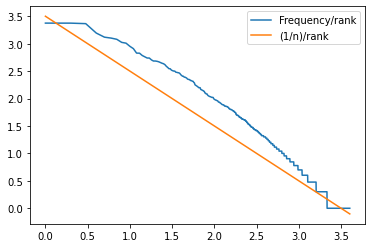

In [234]:
# your code here
import matplotlib.pyplot as plt
import math
token_dic_sorted3 = sorted(token_dic3.items(), key = lambda x:x[1], reverse = True)

y_axis = [math.log10(x[1]) for x in token_dic_sorted3]
x_axis = [math.log10(i) for i in range(1,len(token_dic_sorted3)+1)]
zipf_y = [math.log10(1/rank) + 3.5 for rank in range(1,len(token_dic_sorted3)+1)]

plt.plot(x_axis, y_axis, label="Frequency/rank")
plt.plot(x_axis, zipf_y, label="(1/n)/rank")
plt.legend()
plt.show()


What do you observe? Explain.

Zip's law states that the frequency of nth most common term is proportional to (1/n). From above graph also we can say that as the rank of token reduces, frequency drops by the factor 1/n. Since the graph is matching with the actual log(1/n) + c graph, we can say that it follows Zipf's law.


# Part 2: Boolean Retrieval

In this part you will build an inverted index to support Boolean retrieval. You should use the (1) + (2) tokenization strategy from above (Remove background vocals + Lemmatization). 

We only require your index to support AND queries. In other words, your index does not have to support OR, NOT, or parentheses. Also, we do not explicitly expect to see AND in queries, e.g., when we query **relational model**, your search engine should treat it as **relational** AND **model**.

Search for the queries below using your index and print out matching documents (for each query, print out 5 matching documents):
* time
* never know
* make no sense

Recall, that you should apply the exact same pre-processing strategies to the query as we do to the documents. 

The output should like this:
* DocumentID Document

To make our life easier, please output the DocumentIDs in alphabetical order.

In [235]:
# build the index here
# add cells as needed to organize your codefgghukiu
from collections import defaultdict

lyrics_token_bool = parser(lyrics_doc,2)
inverted_index_dic = defaultdict(set)
document_index = {}
i=0
for key in lyrics_token_bool:
  document_index[i] = key
  i+= 1

for i in document_index:
  for token in lyrics_token_bool[document_index[i]]:
    inverted_index_dic[token].add(i)

# for token in inverted_index_dic.items():
#   print(token)

def boolean_parser(query):
  processed_query = parser({'dummy_key' : str(query)},2)
  processed_query = processed_query['dummy_key']
  # print(processed_query)
  intersecting_doc = inverted_index_dic[processed_query[0]]
  for q in processed_query:
    intersecting_doc = intersecting_doc&inverted_index_dic[q]
  # print(intersecting_doc)
  res = []
  for idx in intersecting_doc:
    res.append(document_index[idx])
  res.sort()
  return (processed_query,res)

  



Now show the results for the query: `time`

In [236]:
# search for the input using your index and print out ids of matching documents.
processed_query, res = boolean_parser('time')
print('\nTop 5 Document ID in alphabetical order are:\n')
for i in range(5):
  # print(res[i],lyrics_doc[res[i]])
  print(res[i])


Top 5 Document ID in alphabetical order are:

5-seconds-of-summer-close-as-strangers-lyrics
Alessia-cara-outlaws-lyrics
Alicia-keys-fallin-lyrics
Alicia-keys-no-one-lyrics
Anitta-goals-lyrics


Now show the results for the query: `never know`


In [237]:
# your code here
processed_query, res = boolean_parser('never know')
print('\nTop 5 Document ID in alphabetical order are:\n')
for i in range(5):
  print(res[i])


Top 5 Document ID in alphabetical order are:

2pac-u-r-ripping-us-apart-dedicated-2-crack-annotated
5-seconds-of-summer-heartbreak-girl-lyrics
Alessia-cara-outlaws-lyrics
Alessia-cara-the-other-side-lyrics
Allie-x-sunflower-synth-reprise-lyrics


Now show the results for the query: `make no sense`

In [238]:
# your code here
processed_query, res = boolean_parser('make no sense')
for i in res:
  print(i)

Bring-me-the-horizon-mother-tongue-lyrics
Devlin-all-along-the-watchtower-lyrics
Florence-the-machine-all-this-and-heaven-too-lyrics
Kid-cudi-ghost-lyrics
Linkin-park-one-step-closer-lyrics


## Observations 
Could your boolean search engine find relevant documents for these queries? What is the impact of the pre-processing options? Do they improve your search quality?

Yes our boolean search engine was able to find the relevant documents for our queries but it was not able to rank the documents according to frequency or relevance. It is giving all the documents that have all queries in them. As it does'nt give a parameter to rank, user can'nt differentiate or rank results.
Pre-processing is helping to give better boolean results. For instance - we are converting runnning/ran/run/runs all into run which helps the model to check presence of query in it. Else it would have considered each runnning/ran/run/runs as separate token and would have skipped few desired results.

# Part 3: Ranking Documents 

In this part, your job is to rank the documents rather than just provide set-based results as in Boolean Retrieval.

### A: Ranking with simple sums of TF-IDF scores 
For a multi-word query, we rank documents by a simple sum of the TF-IDF scores for the query terms in the document.
TF is the log-weighted term frequency $1+log(tf)$; and IDF is the log-weighted inverse document frequency $log(\frac{N}{df})$

**Output:**
You should output the top-5 results plus the TF-IDF sum score of each of these documents. 

The output should be like this:

Rank Scores DocumentID Document 

Now show the results for the query: `time`

In [239]:
# your code here
# hint: you could first call boolean retrieval function in part 2 to find possible relevant documents, 
# and then rank these documents in this part. Hence, you don't need to rank all documents.
def tf_idf(query):
  score_dic = defaultdict(int)
  processed_query, res = boolean_parser(query)
  lyrics_token_p3a = parser(lyrics_doc,2)
  for key in lyrics_token_p3a:
    lyrics_token_p3a[key] = Counter(lyrics_token_p3a[key])
    # print(key,lyrics_token_p3a[key])
  for q in processed_query:
    idf = math.log10(200/len(inverted_index_dic[q]))
    for key in lyrics_token_p3a:
      if q in lyrics_token_p3a[key]:
        score_dic[key] += (math.log10(lyrics_token_p3a[key][q] + 1))*idf
      else:
        score_dic[key] += 0
      
  return score_dic


score_dic = tf_idf('time')
score_dic = sorted(score_dic.items(), key=lambda x:x[1], reverse = True)
for i in range(5):
  print('Rank:',i+1,';','Score:',score_dic[i][1],';','DocumentID:',score_dic[i][0],';','Document:',json.dumps(lyrics_doc[score_dic[i][0]]))
  

Rank: 1 ; Score: 0.5800534800082907 ; DocumentID: Derek-minor-until-the-end-of-time-lyrics ; Document: "\n\n[Intro]\nTime is the fourth dimension\nAnd a measure in which events can ordered\nFrom the past, through the present, into the future\nAll signify that we are all bound to time\n\n[Hook: Derek Minor]\nI be on that work like I'm 'posed to be\nI be on this here until you bury me\nBuildin' His empire that never die\nI bet He'll be here till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\n\n[Verse 1: Derek Minor]\nGrindin', workin', hustlin' on this mission, I will never quit\nEvery single track you put in front of me I'm killin' it\nNot for money, fame, attention, this is what I'm gettin at\nChrist the King and

Now show the results for the query: `never know`

In [199]:
# your code here
score_dic = tf_idf('never know')
score_dic = sorted(score_dic.items(), key=lambda x:x[1], reverse = True)
for i in range(5):
  print('Rank:',i+1,';','Score:',score_dic[i][1],';','DocumentID:',score_dic[i][0],';','Document:',json.dumps(lyrics_doc[score_dic[i][0]]))

Rank: 1 ; Score: 0.6682224676492008 ; DocumentID: Skrillex-pretty-bye-bye-lyrics ; Document: "\n\n[Verse]\nI know you are trouble\nBut I can't seem to get away\nAll the pleasure, all the pain\nPalm trees swaying in the rain\nAll those times we stayed in\nThe way the smoke would fill the room\nAnd we'd be dancing in the clouds\nLike we had nothing to lose\n\n[Chorus]\nI haven't heard from you, it's been a long time\nKnow that I hurt you, it stays on my mind\nLet me make it right\nWe never said goodbye\nWhat you been thinking 'bout?\nKnow that we're worth the fight\nSo let me make it right\nI might have had my doubts\nSaid some things I regret\nIf I could take it back\nI wouldn't hesitate\nWe never said goodbye\nNever said goodbye, baby\nWhat you been thinking 'bout\nYou've been thinking 'bout lately?\nKnow we're worth the fight\nKnow we're worth the fight\nSo let me make it right\nIt's been a long time\n\n[Instrumental break]\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo l

Now show the results for the query: `make no sense`

In [240]:
# your code here
score_dic = tf_idf('make no sense')
score_dic = sorted(score_dic.items(), key=lambda x:x[1], reverse = True)
for i in range(5):
  print('Rank:',i+1,';','Score:',score_dic[i][1],';','DocumentID:',score_dic[i][0],';','Document:',json.dumps(lyrics_doc[score_dic[i][0]]))

Rank: 1 ; Score: 2.255261702323398 ; DocumentID: Bring-me-the-horizon-mother-tongue-lyrics ; Document: "\n\n[Verse 1]\nI didn't see it coming (Coming)\nBut I never really had much faith\nIn the universe's magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I'll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it's hard to explain\nI know you know me, you don't have to show me\nI, I feel you're lonely, no need to explain\n\n[Chorus]\nSo don't say you love me; fala, \"amo\"\nJust let your heart speak up, and I'll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don't say you love me; fala, \"amo\"\nJust let your heart speak up, and I'll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I'm buzzing, oh, love, I'm in troubl

### B: Ranking with vector space model with TF-IDF 

**Cosine:** You should use cosine as your scoring function. 

**TFIDF:** For the document vectors, use the standard TF-IDF scores as introduced in A. For the query vector, use simple weights (the raw term frequency). For example:
* query: never $\rightarrow$ (1)
* query: never know $\rightarrow$ (1, 1)

**Output:**
You should output the top-5 results plus the cosine score of each of these documents.  

The output should be like this:

Rank Scores DocumentID Document 

---

You can additionally assume that your queries will contain at most three words. Be sure to normalize your vectors as part of the cosine calculation!

Now show the results for the query: `time`

In [241]:
# your code here

def doc_score():
  tfidf_doc = defaultdict(int)
  lyrics_token_p3b = parser(lyrics_doc,2)
  for key in lyrics_token_p3b:
    lyrics_token_p3b[key] = Counter(lyrics_token_p3b[key])

  for doc in lyrics_token_p3b: 
    
    for q in lyrics_token_p3b[doc]:
      idf = math.log10(200/len(inverted_index_dic[q]))
      tfidf_doc[doc] += ((math.log10(lyrics_token_p3b[doc][q] + 1))*idf)**2
    
    tfidf_doc[doc] = math.sqrt(tfidf_doc[doc])
  return tfidf_doc



def cosine(doc_score, query):
  processed_query, res = boolean_parser(query)
  cosine_score = {}
  tf_idf_val = tf_idf(query)
  for key in doc_score:

    numerator = tf_idf_val[key]
    denominator1 = doc_score[key]
    denominator2 = math.sqrt(len(processed_query))

    cosine_score[key] = (numerator)/(denominator1*denominator2)

  return cosine_score

tf_idf_doc = doc_score()
# print(tf_idf_doc)
# for i in tf_idf_doc:
#   print(i,tf_idf_doc[i])
cosine_score = cosine(tf_idf_doc, 'time')   
cosine_score = sorted(cosine_score.items(), key = lambda x: x[1] , reverse= True)
for i in range(5):
  print('Rank:',i+1,';','Score:',cosine_score[i][1],';','DocumentID:',cosine_score[i][0],';','Document:',json.dumps(lyrics_doc[cosine_score[i][0]]))
  


Rank: 1 ; Score: 0.15943931447421592 ; DocumentID: John-legend-for-the-first-time-lyrics ; Document: "\n\n[Produced by Dave Tozer & John Legend]\n\n[Verse 1]\nIs that music in my ear\nIt's like I heard nothing for a thousand years\nMy eyes were closed, locking in my tears\n\nI was so surrounded but still all alone\nA great big house but so far from home\nHow'd you breathe life in this heart of soul\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Bridge]\nI'm electric, finally exposed\nYou see through me, strip off all my clothes\nIf this is falling, then let me go, oh\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Verse 2]\nI'm finally awake and I can feel my heart\nIt's beating like a drum when I'm right here where

Now show the results for the query: `never know`

In [242]:
# your code here
cosine_score = cosine(tf_idf_doc, 'never know')   
cosine_score = sorted(cosine_score.items(), key = lambda x: x[1] , reverse= True)
for i in range(5):
  print('Rank:',i+1,';','Score:',cosine_score[i][1],';','DocumentID:',cosine_score[i][0],';','Document:',json.dumps(lyrics_doc[cosine_score[i][0]]))

Rank: 1 ; Score: 0.09043579166658675 ; DocumentID: Skrillex-pretty-bye-bye-lyrics ; Document: "\n\n[Verse]\nI know you are trouble\nBut I can't seem to get away\nAll the pleasure, all the pain\nPalm trees swaying in the rain\nAll those times we stayed in\nThe way the smoke would fill the room\nAnd we'd be dancing in the clouds\nLike we had nothing to lose\n\n[Chorus]\nI haven't heard from you, it's been a long time\nKnow that I hurt you, it stays on my mind\nLet me make it right\nWe never said goodbye\nWhat you been thinking 'bout?\nKnow that we're worth the fight\nSo let me make it right\nI might have had my doubts\nSaid some things I regret\nIf I could take it back\nI wouldn't hesitate\nWe never said goodbye\nNever said goodbye, baby\nWhat you been thinking 'bout\nYou've been thinking 'bout lately?\nKnow we're worth the fight\nKnow we're worth the fight\nSo let me make it right\nIt's been a long time\n\n[Instrumental break]\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo 

Now show the results for the query: `make no sense`

In [243]:
# your code here
cosine_score = cosine(tf_idf_doc, 'make no sense')   
cosine_score = sorted(cosine_score.items(), key = lambda x: x[1] , reverse= True)
for i in range(5):
  print('Rank:',i+1,';','Score:',cosine_score[i][1],';','DocumentID:',cosine_score[i][0],';','Document:',json.dumps(lyrics_doc[cosine_score[i][0]]))

Rank: 1 ; Score: 0.2037982442998006 ; DocumentID: Bring-me-the-horizon-mother-tongue-lyrics ; Document: "\n\n[Verse 1]\nI didn't see it coming (Coming)\nBut I never really had much faith\nIn the universe's magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I'll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it's hard to explain\nI know you know me, you don't have to show me\nI, I feel you're lonely, no need to explain\n\n[Chorus]\nSo don't say you love me; fala, \"amo\"\nJust let your heart speak up, and I'll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don't say you love me; fala, \"amo\"\nJust let your heart speak up, and I'll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I'm buzzing, oh, love, I'm in troub

### C: Ranking with BM25 
Finally, let's try the BM25 approach for ranking. Refer to https://en.wikipedia.org/wiki/Okapi_BM25 for the specific formula. You could choose k_1 = 1.2 and b = 0.75 but feel free to try other options.

**Output:**
You should output the top-5 results plus the BM25 score of each of these documents.  

The output should be like this:

Rank Scores DocumentID Document

Now show the results for the query: `time`

In [244]:
# your code here
lyrics_token_p3c = parser(lyrics_doc,1)
count = 0
for i in lyrics_token_p3c:
  count += len(lyrics_token_p3c[i])
avgdl = count/200
print('Avgdl',avgdl)

def bm25(query, k1, b):
  processed_query, res = boolean_parser(query)
  bm25_score = defaultdict(int)
  lyrics_token_bm = parser(lyrics_doc,2)

  for key in lyrics_token_bm:
    lyrics_token_bm[key] = Counter(lyrics_token_bm[key])

    for q in processed_query:
      idf = math.log10(((200 - len(inverted_index_dic[q]) + 0.5)/(len(inverted_index_dic[q]) + 0.5)) + 1)

      f = lyrics_token_bm[key][q]

      bm25_score[key] += idf * ((f*(k1+1))/(f+k1*(1 - b + (b*len(lyrics_token_p3c[key])/avgdl))))
  
  return bm25_score

bm25_score = bm25('time',1.2,0.75)
bm25_score = sorted(bm25_score.items(), key = lambda x: x[1] , reverse= True)
for i in range(5):
  print('Rank:',i+1,';','Score:',bm25_score[i][1],';','DocumentID:',bm25_score[i][0],';','Document:',json.dumps(lyrics_doc[bm25_score[i][0]]))
  


Avgdl 363.82
Rank: 1 ; Score: 0.8791049498646916 ; DocumentID: John-legend-for-the-first-time-lyrics ; Document: "\n\n[Produced by Dave Tozer & John Legend]\n\n[Verse 1]\nIs that music in my ear\nIt's like I heard nothing for a thousand years\nMy eyes were closed, locking in my tears\n\nI was so surrounded but still all alone\nA great big house but so far from home\nHow'd you breathe life in this heart of soul\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Bridge]\nI'm electric, finally exposed\nYou see through me, strip off all my clothes\nIf this is falling, then let me go, oh\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Verse 2]\nI'm finally awake and I can feel my heart\nIt's beating like a drum when I'm righ

Now show the results for the query: `never know`

In [245]:
# your code here
bm25_score = bm25('never know',1.2,0.75)
bm25_score = sorted(bm25_score.items(), key = lambda x: x[1] , reverse= True)
for i in range(5):
  print('Rank:',i+1,';','Score:',bm25_score[i][1],';','DocumentID:',bm25_score[i][0],';','Document:',json.dumps(lyrics_doc[bm25_score[i][0]]))

Rank: 1 ; Score: 1.2650022509349692 ; DocumentID: Skrillex-pretty-bye-bye-lyrics ; Document: "\n\n[Verse]\nI know you are trouble\nBut I can't seem to get away\nAll the pleasure, all the pain\nPalm trees swaying in the rain\nAll those times we stayed in\nThe way the smoke would fill the room\nAnd we'd be dancing in the clouds\nLike we had nothing to lose\n\n[Chorus]\nI haven't heard from you, it's been a long time\nKnow that I hurt you, it stays on my mind\nLet me make it right\nWe never said goodbye\nWhat you been thinking 'bout?\nKnow that we're worth the fight\nSo let me make it right\nI might have had my doubts\nSaid some things I regret\nIf I could take it back\nI wouldn't hesitate\nWe never said goodbye\nNever said goodbye, baby\nWhat you been thinking 'bout\nYou've been thinking 'bout lately?\nKnow we're worth the fight\nKnow we're worth the fight\nSo let me make it right\nIt's been a long time\n\n[Instrumental break]\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo l

Now show the results for the query: `make no sense`

In [246]:
# your code here
bm25_score = bm25('make no sense',1.2,0.75)
bm25_score = sorted(bm25_score.items(), key = lambda x: x[1] , reverse= True)
for i in range(5):
  print('Rank:',i+1,';','Score:',bm25_score[i][1],';','DocumentID:',bm25_score[i][0],';','Document:',json.dumps(lyrics_doc[bm25_score[i][0]]))

Rank: 1 ; Score: 4.2770911215867695 ; DocumentID: Bring-me-the-horizon-mother-tongue-lyrics ; Document: "\n\n[Verse 1]\nI didn't see it coming (Coming)\nBut I never really had much faith\nIn the universe's magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I'll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it's hard to explain\nI know you know me, you don't have to show me\nI, I feel you're lonely, no need to explain\n\n[Chorus]\nSo don't say you love me; fala, \"amo\"\nJust let your heart speak up, and I'll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don't say you love me; fala, \"amo\"\nJust let your heart speak up, and I'll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I'm buzzing, oh, love, I'm in troub

### Discussion 
Briefly discuss the differences you see between the three methods. You should try additional queries beyond the ones we list. Is there a ranking approach you prefer? Explain and give concrete examples.


Let us understand from 2 examples.

INSTANCE-1

For query 'boat' we got following scores:

TF_IDF

Rank: 1 ; Score: 0.8702256269735131 ; DocumentID: Sam-smith-blind-eye-lyrics

Rank: 2 ; Score: 0.5490512403779657 ; DocumentID: Major-lazer-cold-water-lyrics

Rank: 3 ; Score: 0.5490512403779657 ; DocumentID: Kris-kross-amsterdam-and-conor-maynard-are-you-sure-lyrics

Rank: 4 ; Score: 0 ; DocumentID: Erykah-badu-kiss-me-on-my-neck-lyrics

Rank: 5 ; Score: 0 ; DocumentID: Daniel-caesar-we-find-love-lyrics

COSINE

Rank: 1 ; Score: 0.5800534800082907 ; DocumentID: Derek-minor-until-the-end-of-time-lyrics

Rank: 2 ; Score: 0.524132767165299 ; DocumentID: John-legend-for-the-first-time-lyrics

Rank: 3 ; Score: 0.4882147063795788 ; DocumentID: Method-man-if-time-is-money-fly-navigation-lyrics

Rank: 4 ; Score: 0.40647747202618945 ; DocumentID: Partynextdoor-not-nice-lyrics

Rank: 5 ; Score: 0.40647747202618945 ; DocumentID: Linkin-park-from-the-inside-lyrics

BM25

Rank: 1 ; Score: 2.8897554160315315 ; DocumentID: Sam-smith-blind-eye-lyrics

Rank: 2 ; Score: 1.8791898980781874 ; DocumentID: Kris-kross-amsterdam-and-conor-maynard-are-you-sure-lyrics

Rank: 3 ; Score: 1.824404156406801 ; DocumentID: Major-lazer-cold-water-lyrics

Rank: 4 ; Score: 0.0 ; DocumentID: Erykah-badu-kiss-me-on-my-neck-lyrics

Rank: 5 ; Score: 0.0 ; DocumentID: Daniel-caesar-we-find-love-lyrics


OBSERVATION: We can observe from above data that scoring for 'boat' is same for two different document in TF-IDF. But for same 2 documents the scoring is different in BM-25. This is because the TF_IDF just takes frequency into consideration whereas BM-25 takes both frequency as well as length of document into consideration. 


INSTANCE-2

For query 'make no sense' we get following results:

TF-IDF:

1) Bring-me-the horizon...

2) Florence-the-machine...

3) Kid-cudi-ghost-lyrics...

4) Linkin-park-one-....

5) Devlin-all-along...

Cosine:

1) Bring-me-the horizon...

2) Florence-the-machine...

3) Linkin-park-one-....

4) Kid-cudi-ghost-lyrics...

5) Shawn-mendes-act-like...

BM-25:

1) Bring-me-the horizon...

2) Florence-the-machine...

3) Linkin-park-one-....

4) Kid-cudi-ghost-lyrics...

5) Shawn-mendes-act-like...


We can see that almost top 5 ranking documents shared by our model are same. However, if the dataset would be big we would have got different results due to different characteristic of each model which I will discuss below.


TF-IDF is simple use multiplication of Term frequency and Inverse term frequency. By IDF it gives more importance to the rare and distinctive words in the text.It may work well for short documents where the number of words is less. TF_IDF can not show importance of different words as it gives equal weight to all. 

Cosine on the other hand normalize the vector distance unlike euclidean distance. Even if the two documents are far apart because of size, they could still have smaller angle in cosine method. The higher the angle, the more dissimiliar are the documents. Cosine measures the angle of the data vectors in vector space and not the magnitude.

BM25 takes into account both frequency of words as well as the length of document so it is good for capturing the context of the text. It is the best among above two and is widely used. However just like above two it also does not give importance to the order of words.

Based on the above reasons I would like to rank in following way:

BM25 > Cosine > TF-IDF


# Part 4: Cool Extension 

Finally, we give you an opportunity to explore some more sophisticated approach to your search engine. This is your chance to show off something you find interesting. For example, you might:


*   Add a positional index so you can support phrase queries
*   Implement a permuterm index for wildcard queries
*   Incorporate spell correction
*   Index all of the lyrics at https://www.cs.cornell.edu/~arb/data/genius-expertise/ and demonstrate an efficient implementation
*   Try a more advanced ranking approach
*   ...

We will grade this last part according to effort, creativity, and impact.



# Collaboration Declarations

** You should fill out your collaboration declarations here.**

**Reminder:** You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by filling out the Collaboration Declarations at the bottom of this notebook.

Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.

Answer:

Here I am incorporating spell correction.
I am using levenshtein distance to know the closest word to incorrect query from existing tokens. This is then converted into correct query and shared to model for gettting desired results.

In [224]:
from numpy import unique
def levenshtein_dist(str1, str2, m, n, dp):
    if dp[m][n] != -1:
        return dp[m][n]
    if m == 0:
        return n
    if n == 0:
        return m
    if str1[m-1] == str2[n-1]:
        dp[m][n] = levenshtein_dist(str1, str2, m-1, n-1, dp)
    else:
        dp[m][n] = 1 + min(levenshtein_dist(str1, str2, m-1, n-1, dp), levenshtein_dist(str1, str2, m, n-1, dp), levenshtein_dist(str1, str2, m-1, n, dp))
    return dp[m][n]


def spelling_correction(query, terms, max_dist):
    corrected = query
    min_distance = float('inf')
    for term in terms:
        m = len(query)
        n = len(term)
        dp = [[-1 for j in range(n+1)] for i in range(m+1)]
        distance = levenshtein_dist(query, term, m,n,dp)
        if distance < min_distance:
            min_distance = distance
            corrected = term
    if min_distance <= max_dist:
        return corrected
    return query

def corrected_phrase(query, option, max_dist):

  lyrics_token_p4 = parser(lyrics_doc, option)
  unique_tokens = set()
  for doc in lyrics_token_p4:
    for token in lyrics_token_p4[doc]:
      unique_tokens.add(token)
  processed_query, res = boolean_parser(query)
  # print('im' in unique_tokens)
  corrected_phrase = ""
  for q in processed_query:
    corrected_phrase += spelling_correction(q, unique_tokens, max_dist) + ' '
  return corrected_phrase

max_dist = 2
incorrect_queries = ['gospal knoo', 'sittimm in boatt','lovv comei crahhing donn']
correct_queries = []
for p in incorrect_queries:
  corrected_p = corrected_phrase(p, 0, max_dist)
  print('\nIncorrected phrase:',p, '   Corrected phrase:', corrected_p)
  correct_queries.append(corrected_p)

for q in correct_queries:
  bm25_score = bm25(q ,1.2,0.75)
  bm25_score = sorted(bm25_score.items(), key = lambda x: x[1] , reverse= True)
  print('\n The top 5 search results for',q,'query')
  for i in range(5):
    print('Rank:',i+1,';','Score:',bm25_score[i][1],';','DocumentID:',bm25_score[i][0],';','Document:',json.dumps(lyrics_doc[bm25_score[i][0]]))




Incorrected phrase: gospal knoo    Corrected phrase: gospel know 

Incorrected phrase: sittimm in boatt    Corrected phrase: sitting in boat 

Incorrected phrase: lovv comei crahhing donn    Corrected phrase: love come crashing down 

 The top 5 search results for gospel know  query
Rank: 1 ; Score: 2.497231813204691 ; DocumentID: Sam-smith-blind-eye-lyrics ; Document: "\n\n[Verse 1]\nI hear you call for me with a million eyes\nYou take us gospel but I don't deny\nBut you won't succeed, 'cause I've been tipped off\nI just turned a blind eye for way too long\nOoh-ooh, ooh, ooh-ooh, ooh-ooh\n\n[Verse 2]\nPeople like me don't pick a fight with you\nBut underneath the bridge we gather two by two\nIf we don't succeed, well, at least we tried\nTurned around to face you with a one blind eye\n\n[Chorus]\nI'm gonna carry you over (Carry you over)\nPull you in closer (Pull you in closer)\nOne by one, we marry the night\nSitting on the same boat on different sides\nStaring at each other with our